In [1]:
import gpflow as gp
import numpy as np
import pandas as pd
from gpflow.utilities import print_summary
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv('32branin.csv')

In [3]:
print(data)

         X1        X2         y
0  -5.00000   0.00000  308.1300
1   2.50000   7.50000   24.1300
2  -1.25000  11.25000   22.3830
3   6.25000   3.75000   26.6240
4  -3.12500   9.37500    8.5797
5   4.37500   1.87500    6.9550
6   0.62500   5.62500   18.1110
7   8.12500  13.12500  140.3300
8  -4.06250  14.06200    4.4762
9   3.43750   6.56250   21.1280
10 -0.31250   2.81250   32.8080
11  7.18750  10.31200   98.3480
12 -2.18750   4.68750   33.7380
13  5.31250  12.18800  136.3500
14  1.56250   8.43750   31.3220
15  9.06250   0.93750    2.5808
16 -4.53120   7.96880   70.6080
17  2.96880   0.46875    4.3236
18 -0.78125   4.21880   26.4500
19  6.71880  11.71900  130.6500
20 -2.65620   2.34380   78.8640
21  4.84380   9.84380   83.8810
22  1.09380  13.59400   98.6810
23  8.59380   6.09380   21.4240
24 -3.59380   7.03120   41.7720
25  3.90620  14.53100  166.3200
26  0.15625  10.78100   44.7540
27  7.65620   3.28120   15.4730
28 -1.71880  12.65600   21.1100
29  5.78120   5.15620   34.7370
30  2.03

In [13]:
#format X and y
X = np.array(data.values[:,:2]).reshape(32,2)
y = np.array(data.values[:,2]).reshape(32,1)
#kernel & mean
k = gp.kernels.SquaredExponential()
mean = gp.mean_functions.Zero()

In [14]:
m1 = gp.models.GPR(data=(X,y), kernel = k, mean_function=mean, noise_variance=0.001)

In [15]:
print_summary(m1)
print(m1.log_marginal_likelihood())

name                     class      transform    trainable    shape    dtype      value
-----------------------  ---------  -----------  -----------  -------  -------  -------
GPR.kernel.variance      Parameter  Softplus     True         ()       float64    1
GPR.kernel.lengthscale   Parameter  Softplus     True         ()       float64    1
GPR.likelihood.variance  Parameter  Softplus     True         ()       float64    0.001
tf.Tensor(-102246.16724543413, shape=(), dtype=float64)


In [50]:
print("Model fitting on y")
print("Model parameters:")
opt = gp.optimizers.Scipy()

def objective_closure():
    return - m1.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        m1.trainable_variables,
                        options=dict(maxiter=100))
print_summary(m1)
print("")
print("Log marginal likelihood is:")
print(m1.log_marginal_likelihood())

Model fitting on y
Model parameters:
name                     class      transform    trainable    shape    dtype          value
-----------------------  ---------  -----------  -----------  -------  -------  -----------
GPR.kernel.variance      Parameter  Softplus     True         ()       float64  336215
GPR.kernel.lengthscale   Parameter  Softplus     True         ()       float64      12.505
GPR.likelihood.variance  Parameter  Softplus     True         ()       float64      65.7582

Log marginal likelihood is:
tf.Tensor(-147.56672218714675, shape=(), dtype=float64)


tf.Tensor(-147.56672218714675, shape=(), dtype=float64)


In [18]:
x1 = np.linspace(-5, 10, 50).reshape(50,1)
x2 = np.linspace(0, 15, 50).reshape(50,1)
# y = []
# for i in x1:
#     y_i = []
#     for j in x2:
#         #y_i.append(m1.predict_f(np.array([i,j]).reshape(1,2)))
#         print(m1.predict_f(np.array([i,j]).reshape(1,2))[0].numpy()[0][0])
#     y.append(y_i)
y_plot = [[m1.predict_f(np.array([i,j]).reshape(1,2))[0].numpy()[0][0] for j in x2] for i in x1]


In [19]:
y_plot_2 = [[m1.predict_f(np.array([i,j]).reshape(1,2))[1].numpy()[0][0] for j in x2] for i in x1]

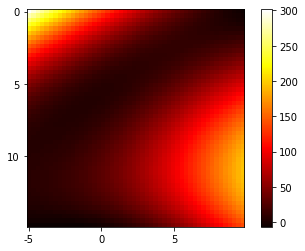

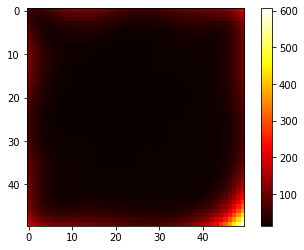

In [42]:
fig, ax = plt.subplots()
im = ax.imshow(y_plot, cmap='hot')
ax.set_xticks(np.arange(0,50,50/3))
ax.set_xticklabels(np.arange(-5,10,5))
ax.set_yticks(np.arange(0,50,50/3))
ax.set_yticklabels(np.arange(0,15,5))
plt.colorbar(im)
plt.savefig('before_transform_posterior_mean.png')
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(y_plot_2, cmap='hot')
ax.set_xticks(np.arange(0,50,50/3))
ax.set_xticklabels(np.arange(-5,10,5))
ax.set_yticks(np.arange(0,50,50/3))
ax.set_yticklabels(np.arange(0,15,5))
plt.colorbar(im2)
plt.savefig('before_transform_std.png')

In [48]:
print("Model fitting on log_y")
print("Model parameters:")
y_log = np.log(y)
m_log = gp.models.GPR(data=(X,y_log), kernel = gp.kernels.SquaredExponential(), mean_function=gp.mean_functions.Zero(), noise_variance=0.001)
opt = gp.optimizers.Scipy()

def objective_closure():
    return - m_log.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        m_log.trainable_variables,
                        options=dict(maxiter=100))
print_summary(m_log)
print("")
print("Log marginal likelihood is:")
print(m_log.log_marginal_likelihood())

Model fitting on log_y
Model parameters:
name                     class      transform    trainable    shape    dtype           value
-----------------------  ---------  -----------  -----------  -------  -------  ------------
GPR.kernel.variance      Parameter  Softplus     True         ()       float64  10.8362
GPR.kernel.lengthscale   Parameter  Softplus     True         ()       float64   4.02648
GPR.likelihood.variance  Parameter  Softplus     True         ()       float64   0.000316487

Log marginal likelihood is:
tf.Tensor(-33.8660255070385, shape=(), dtype=float64)


In [32]:
y_plot_log = [[m_log.predict_f(np.array([i,j]).reshape(1,2))[0].numpy()[0][0] for j in x2] for i in x1]
y_plot_2_log = [[m_log.predict_f(np.array([i,j]).reshape(1,2))[1].numpy()[0][0] for j in x2] for i in x1]

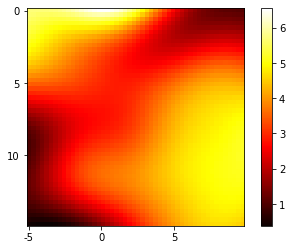

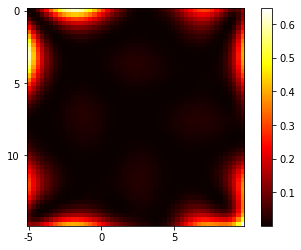

In [43]:
fig_log, ax_log = plt.subplots()
im_log = ax_log.imshow(y_plot_log, cmap='hot')
ax_log.set_xticks(np.arange(0,50,50/3))
ax_log.set_xticklabels(np.arange(-5,10,5))
ax_log.set_yticks(np.arange(0,50,50/3))
ax_log.set_yticklabels(np.arange(0,15,5))
plt.colorbar(im_log)
plt.savefig('after_transform_posterior_mean.png')
fig2_log, ax2_log = plt.subplots()
im2_log = ax2_log.imshow(y_plot_2_log, cmap='hot')
ax2_log.set_xticks(np.arange(0,50,50/3))
ax2_log.set_xticklabels(np.arange(-5,10,5))
ax2_log.set_yticks(np.arange(0,50,50/3))
ax2_log.set_yticklabels(np.arange(0,15,5))
plt.colorbar(im2_log)
plt.savefig('after_transform_std.png')

In [40]:
kernel_list = [gp.kernels.SquaredExponential(), 
               gp.kernels.Matern12(), 
               gp.kernels.Matern32(),
               gp.kernels.Matern52(),
               gp.kernels.RationalQuadratic(),
               gp.kernels.ArcCosine()]
mean_list = [gp.mean_functions.Zero(),
        gp.mean_functions.Constant(),
            gp.mean_functions.Identity()]
model_evidence_search = []
def objective_closure_bic():
    return tf.constant(3*np.log(32))- 2*m_opt.log_marginal_likelihood()
for i in kernel_list:
    for j in mean_list:
        #print(i)
        m_opt = gp.models.GPR(data=(X,y_log), kernel = i, mean_function=j, noise_variance=0.001)
        opt = gp.optimizers.Scipy()
        opt_logs = opt.minimize(objective_closure_bic,
                                m_opt.trainable_variables,
                                options=dict(maxiter=100))
        model_evidence_search.append(objective_closure_bic())

min_model_index = np.argmax(model_evidence_search)
print("The best model found have kernel: ")
print(kernel_list[int(min_model_index/3)])
print("and mean function: ")
print(mean_list[min_model_index%3])
print("The BIC score for the model is: ")
print(model_evidence_search[min_model_index])

The best model found have kernel: 
and mean function: 
The BIC score for the model is: 
tf.Tensor(231.15696375035148, shape=(), dtype=float64)


In [34]:
import csv

In [37]:
with open('before_log_transform.csv', 'w+') as myfile:
    csvWriter = csv.writer(myfile, delimiter=',')
    csvWriter.writerows(y_plot)

NameError: name 'close' is not defined

In [38]:
with open('after_log_transform.csv', 'w+') as myfile:
    csvWriter = csv.writer(myfile, delimiter=',')
    csvWriter.writerows(y_plot_log)